# Qubitization Walk Operator

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `QubitizationWalkOperator`
Constructs a Szegedy Quantum Walk operator using LCU oracles SELECT and PREPARE.

For a Hamiltonian $H = \sum_l w_l H_l$ (s.t. $w_l > 0$ and $H_l$ are unitaries),
Constructs a Szegedy quantum walk operator $W = R_{L} . SELECT$, which is a product of
two reflections $R_{L} = (2|L><L| - I)$ and $SELECT=\sum_{l}|l><l|H_{l}$.

The action of $W$ partitions the Hilbert space into a direct sum of two-dimensional irreducible
vector spaces. For an arbitrary eigenstate $|k>$ of $H$ with eigenvalue $E_k$, $|\ell>|k>$ and
an orthogonal state $\phi_{k}$ span the irreducible two-dimensional space that $|\ell>|k>$ is
in under the action of $W$. In this space, $W$ implements a Pauli-Y rotation by an angle of
$-2arccos(E_{k} / \lambda)$ s.t. $W = e^{i arccos(E_k / \lambda) Y}$,
where $\lambda = \sum_l w_l$.

Thus, the walk operator $W$ encodes the spectrum of $H$ as a function of eigenphases of $W$
s.t. $spectrum(H) = \lambda cos(arg(spectrum(W)))$ where $arg(e^{i\phi}) = \phi$.

#### Parameters
 - `select`: The SELECT lcu gate implementing $SELECT=\sum_{l}|l><l|H_{l}$.
 - `prepare`: Then PREPARE lcu gate implementing $PREPARE|00...00> = \sum_{l=0}^{L - 1}\sqrt{\frac{w_{l}}{\lambda}} |l> = |\ell>$
 - `control_val`: If 0/1, a controlled version of the walk operator is constructed. Defaults to None, in which case the resulting walk operator is not controlled. 

#### References
 - [Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity] (https://arxiv.org/abs/1805.03662).     Babbush et. al. (2018). Figure 1.


In [2]:
from qualtran.bloqs.qubitization_walk_operator import QubitizationWalkOperator

### Example Instances

In [3]:
from qualtran.bloqs.qubitization_walk_operator_test import get_walk_operator_for_1d_ising_model

walk_op = get_walk_operator_for_1d_ising_model(4, 2e-1)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([walk_op],
           ['`walk_op`'])

### Call Graph

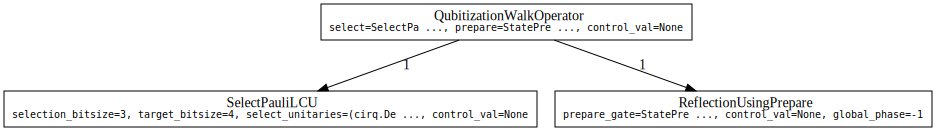

#### Counts totals:
 - `ReflectionUsingPrepare(prepare_gate=StatePreparationAliasSampling(selection_registers=(Register(name='selection', dtype=BoundedQUInt(bitsize=3, iteration_length=8), shape=(), side=<Side.THRU: 3>),), alt=array([0, 1, 2, 3, 4, 5, 6, 7]), keep=array([0, 0, 0, 0, 0, 0, 0, 0]), mu=0, sum_of_lcu_coeffs=8.0), control_val=None, global_phase=-1)`: 1
 - `SelectPauliLCU(selection_bitsize=3, target_bitsize=4, select_unitaries=(cirq.DensePauliString('ZZII', coefficient=(1+0j)), cirq.DensePauliString('IZZI', coefficient=(1+0j)), cirq.DensePauliString('IIZZ', coefficient=(1+0j)), cirq.DensePauliString('ZIIZ', coefficient=(1+0j)), cirq.DensePauliString('XIII', coefficient=(-1+0j)), cirq.DensePauliString('IXII', coefficient=(-1+0j)), cirq.DensePauliString('IIXI', coefficient=(-1+0j)), cirq.DensePauliString('IIIX', coefficient=(-1+0j))), control_val=None)`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
walk_op_g, walk_op_sigma = walk_op.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(walk_op_g)
show_counts_sigma(walk_op_sigma)